In [91]:
import numpy as np
import scipy
import matplotlib
from scipy.io import wavfile
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

from scipy import signal
from sklearn import manifold
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import NMF

# PCA credit to http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# ICA credit to http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html
# NMF credit to http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html

# Problem 1

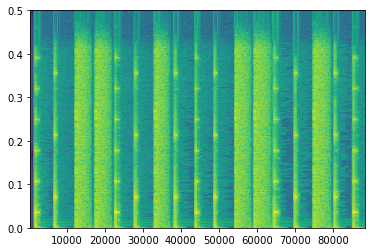

In [92]:
rate, data = wavfile.read('vl1.wav')
spec, freqs, t, im = plt.specgram(data, NFFT=1024, Fs=1.0, noverlap=768,window=np.hamming(1024))
# plt.imshow(np.sqrt(np.abs(spec)),aspect='auto',origin='lower')
plt.show()

# PCA

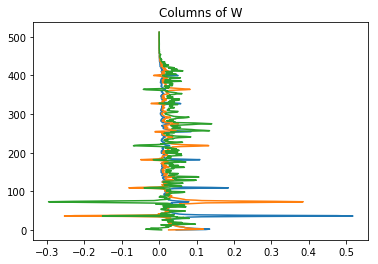

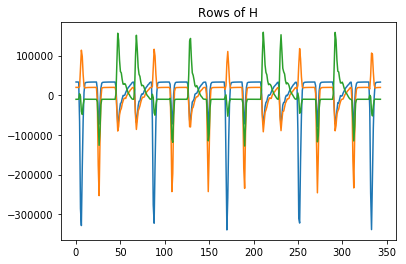

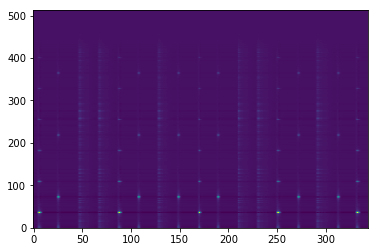

In [93]:
spectrum = np.sqrt(np.abs(spec))
matrix = spectrum - spectrum.mean(axis=1).reshape(-1, 1)
matrix_data = matrix.T
u,s,v = np.linalg.svd(matrix_data)
W = (v.T)[:,0:3]
S = np.identity(3)
np.fill_diagonal(S, [s[0],s[1],s[2]])
H = np.dot(u[:,0:3],S)
X_pca = np.dot(W,H.T)

plt.plot(-W[:,0],[x for x in range(513)])
plt.plot(-W[:,1],[x for x in range(513)])
plt.plot(W[:,2],[x for x in range(513)])
plt.title('Columns of W')
plt.show()

plt.plot(H)
plt.title('Rows of H')
plt.show()

plt.imshow(X_pca,aspect='auto',origin='lower')
plt.show()

# Using sklearn PCA func to make sure resultsare correct

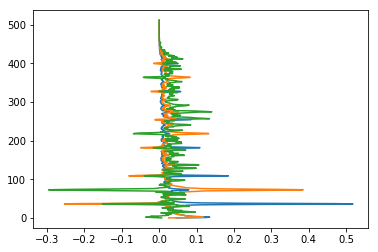

In [94]:
pca = PCA()
X_transformed = pca.fit_transform(matrix_data)
k=0

for eigenvector in pca.components_:    
    plt.plot(eigenvector,[x for x in range(513)])
    k = k+1
    if k >= 3:
        break
plt.show()

# ICA

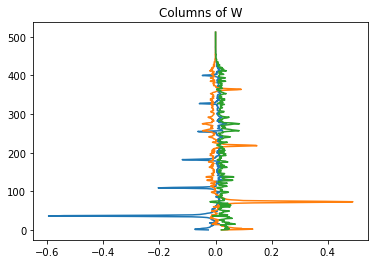

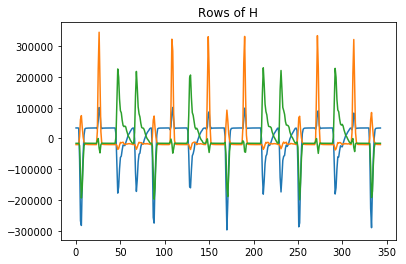

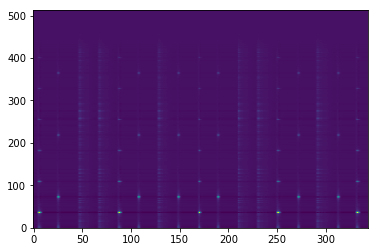

In [95]:
ica = FastICA(n_components=3)
S_ = ica.fit_transform(W)   # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

W_pca_followedby_ica = np.linalg.pinv(np.dot(ica.components_,W.T))
H_ica = np.dot(H,ica.components_)
X_ica = np.dot(W,H.T)

plt.plot(W_pca_followedby_ica[:,0],[x for x in range(513)])
plt.plot(W_pca_followedby_ica[:,1],[x for x in range(513)])
plt.plot(W_pca_followedby_ica[:,2],[x for x in range(513)])
plt.title('Columns of W')
plt.show()

plt.plot(H_ica)
plt.title('Rows of H')
plt.show()

plt.imshow(X_ica,aspect='auto',origin='lower')
plt.show()

# NMF

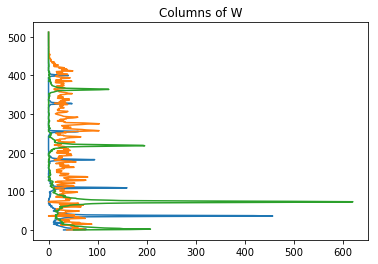

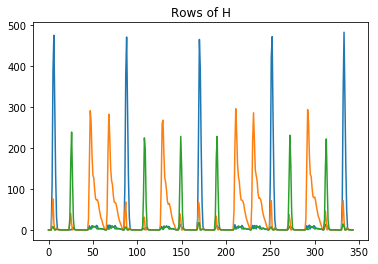

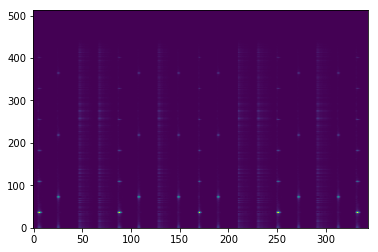

In [96]:
model = NMF(n_components=3, init='random', random_state=0)
H_nmf = model.fit_transform(spectrum.T)
W_nmf = model.components_
X_nmf = np.dot(W_nmf.T,H_nmf.T)

plt.plot(W_nmf[0,:],[x for x in range(513)])
plt.plot(W_nmf[1,:],[x for x in range(513)])
plt.plot(W_nmf[2,:],[x for x in range(513)])
plt.title('Columns of W')
plt.show()

plt.plot(H_nmf)
plt.title('Rows of H')
plt.show()

plt.imshow(X_nmf,aspect='auto',origin='lower')
plt.show()

Q: What observations can you make? How do the results differ? Which ones make the most sense?

A: As we can see above, PCA captures important components. ICA and NMF are better to distinguish three instruments according to columns of W and rows of H. Since we do ICA after PCA, it is reasonable that we would get better result of ICA than PCA. As for NMF, it directly decompose the input and get better result than PCA in this problem.

# Problem 2

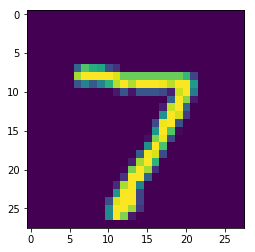

In [97]:
data_pro2 = scipy.io.loadmat('digits.mat')
data_d = data_pro2['d']
data_reshape = np.reshape(data_d[:,0],(28,28),'F')
plt.imshow(data_reshape)
plt.show()

# PCA

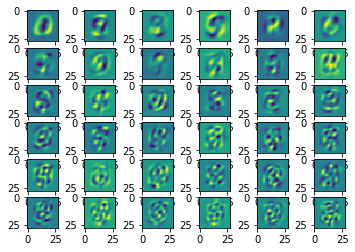

In [98]:
pca_prob2 = PCA()
pro2_X_transformed = pca_prob2.fit_transform(data_d.T)
fig, ax = plt.subplots(6,6)
k = 0
for row in ax:
    for col in row:
        col.imshow(np.reshape((pca_prob2.components_)[k,:],(28,28),'F'))
        k = k+1
plt.show()

# ICA

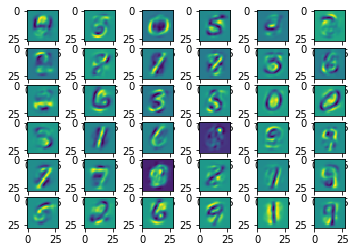

In [99]:
p2_ica = FastICA(n_components=36)
S_ = p2_ica.fit_transform(np.dot(pca_prob2.components_[0:36,:], data_d).T)
prob2_W_pca_followedby_ica = np.linalg.pinv(np.dot(p2_ica.components_,pca_prob2.components_[0:36,:]))
fig, ax = plt.subplots(6,6)
k = 0
for row in ax:
    for col in row:
        col.imshow(np.reshape((prob2_W_pca_followedby_ica)[:,k],(28,28),'F'))
        k = k+1
plt.show()

# NMF

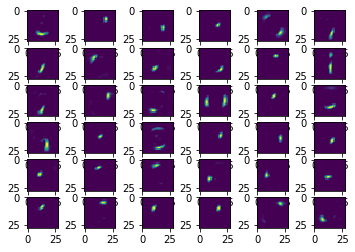

In [100]:
model = NMF(n_components=36, init='random', random_state=0)
p2_H_nmf = model.fit_transform(data_d.T)
p2_W_nmf = model.components_
fig, ax = plt.subplots(6,6)
k = 0
for row in ax:
    for col in row:
        col.imshow(np.reshape((p2_W_nmf.T)[:,k],(28,28),'F'))
        k = k+1
plt.show()

Q: Make observations on how and why they differ

A: It's obvious that ICA has better result than only PCA. As we can see above, only PCA can capture key features of images but can not distinguish digits. The results of ICA(PCA beforehand) show that it can distinguish digits decently because ICA can separate multivariate signal into additive subcomponents. As for NMF, it only captures key components of digits.

# Problem 3

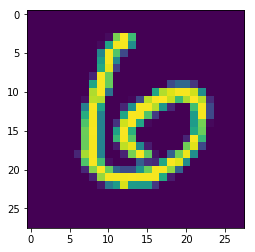

In [101]:
data_pro3 = scipy.io.loadmat('digits.mat')
data_p3 = data_pro3['d']
data_labels = data_pro3['l']
labels = np.where(data_labels == 6)
data_labeled = data_p3[:, labels[1]]#Select only the columns that correspond to the digit 6
plt.imshow(np.reshape(data_labeled[: , 0], (28,28), 'F'))
plt.show()

In [102]:
# function credit to https://stackoverflow.com/questions/4860417/placing-custom-images-in-a-plot-window-as-custom-data-markers-or-to-annotate-t
def plot_embedding(data_2d):
    fig = plt.gcf()
    fig.clf()
    ax = plt.subplot(111)

    # add images
    for j in range(200):
        cur_img = np.reshape(data_labeled[: , j], (28,28), 'F')
        imagebox = OffsetImage(cur_img, zoom=0.5)
        xy = [data_2d[j,1], data_2d[j,0]]               # coordinates to position this image

        ab = AnnotationBbox(imagebox, xy,
            xybox=(0., 0.),
            xycoords='data',
            boxcoords="offset points", pad=0)                                  
        ax.add_artist(ab)

    #ax.grid(True)
    plt.xlim(min(data_2d[:,1]), max(data_2d[:,1]))
    plt.ylim(min(data_2d[:,0]), max(data_2d[:,0]))
    plt.draw()
    plt.show()

# PCA

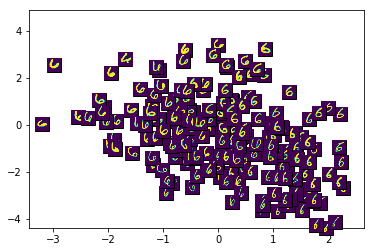

In [103]:
pca_prob3 = PCA()
pro3_X_transformed = pca_prob3.fit_transform(data_p3.T)
X_centered = (data_labeled - data_labeled.mean(axis=1, keepdims=True)).transpose()
plot_embedding(np.dot(X_centered,pca_prob3.components_[0:2,:].T))

# Laplacian Eigenmaps

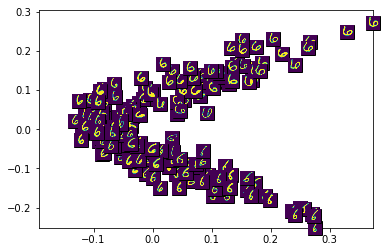

In [104]:
pro3_manifold = manifold.SpectralEmbedding(n_components=2, affinity='nearest_neighbors', random_state=0,n_neighbors = 10, eigen_solver="arpack")
plot_embedding(pro3_manifold.fit_transform(data_labeled.T))

Right bottom parts of images have thinner digits than left top parts when we use PCA. Bottom parts of images have thinner digits than top parts when we use Laplacian Eigenmaps.